# Final Project
## Restaurant Waiting Simulation
### Tyler Baker

### Goals
Using SimPy:

1.  State the problem and its significance.

2.  Provide a flow-chart model. 

3.  Simulate the process for the appropriate number of iterations (justify)

4.  Justify the validity of the model and discuss how you verified it.

5.  State  your conclusions/ findings from the model. 

6.  Generate appropriate graphs (more than one) to illustrate the results and provide a PowerPoint presentation to share with your colleagues.  Post this to the discussion. 

### The Problem
Restaurants constantly lose business because of wait time issues. It is more significant now than ever before. Restaurants were one of if not the most hurt by the pandemic. Restaurants must be on top of their game if they wish to survive throughout the pandemic. The goal is to see what the minimal amount of tables needed to ensure that everyone is seated. If a restaurant doesn't have the required amount of tables, then they should rethink their business model. For example, maybe small store fronts should be delivery or carry out only. It's probably better to have no tables to allow for a bigger kitchen, then to have a few tables and let unhappy customers leave.

### Flow Chart

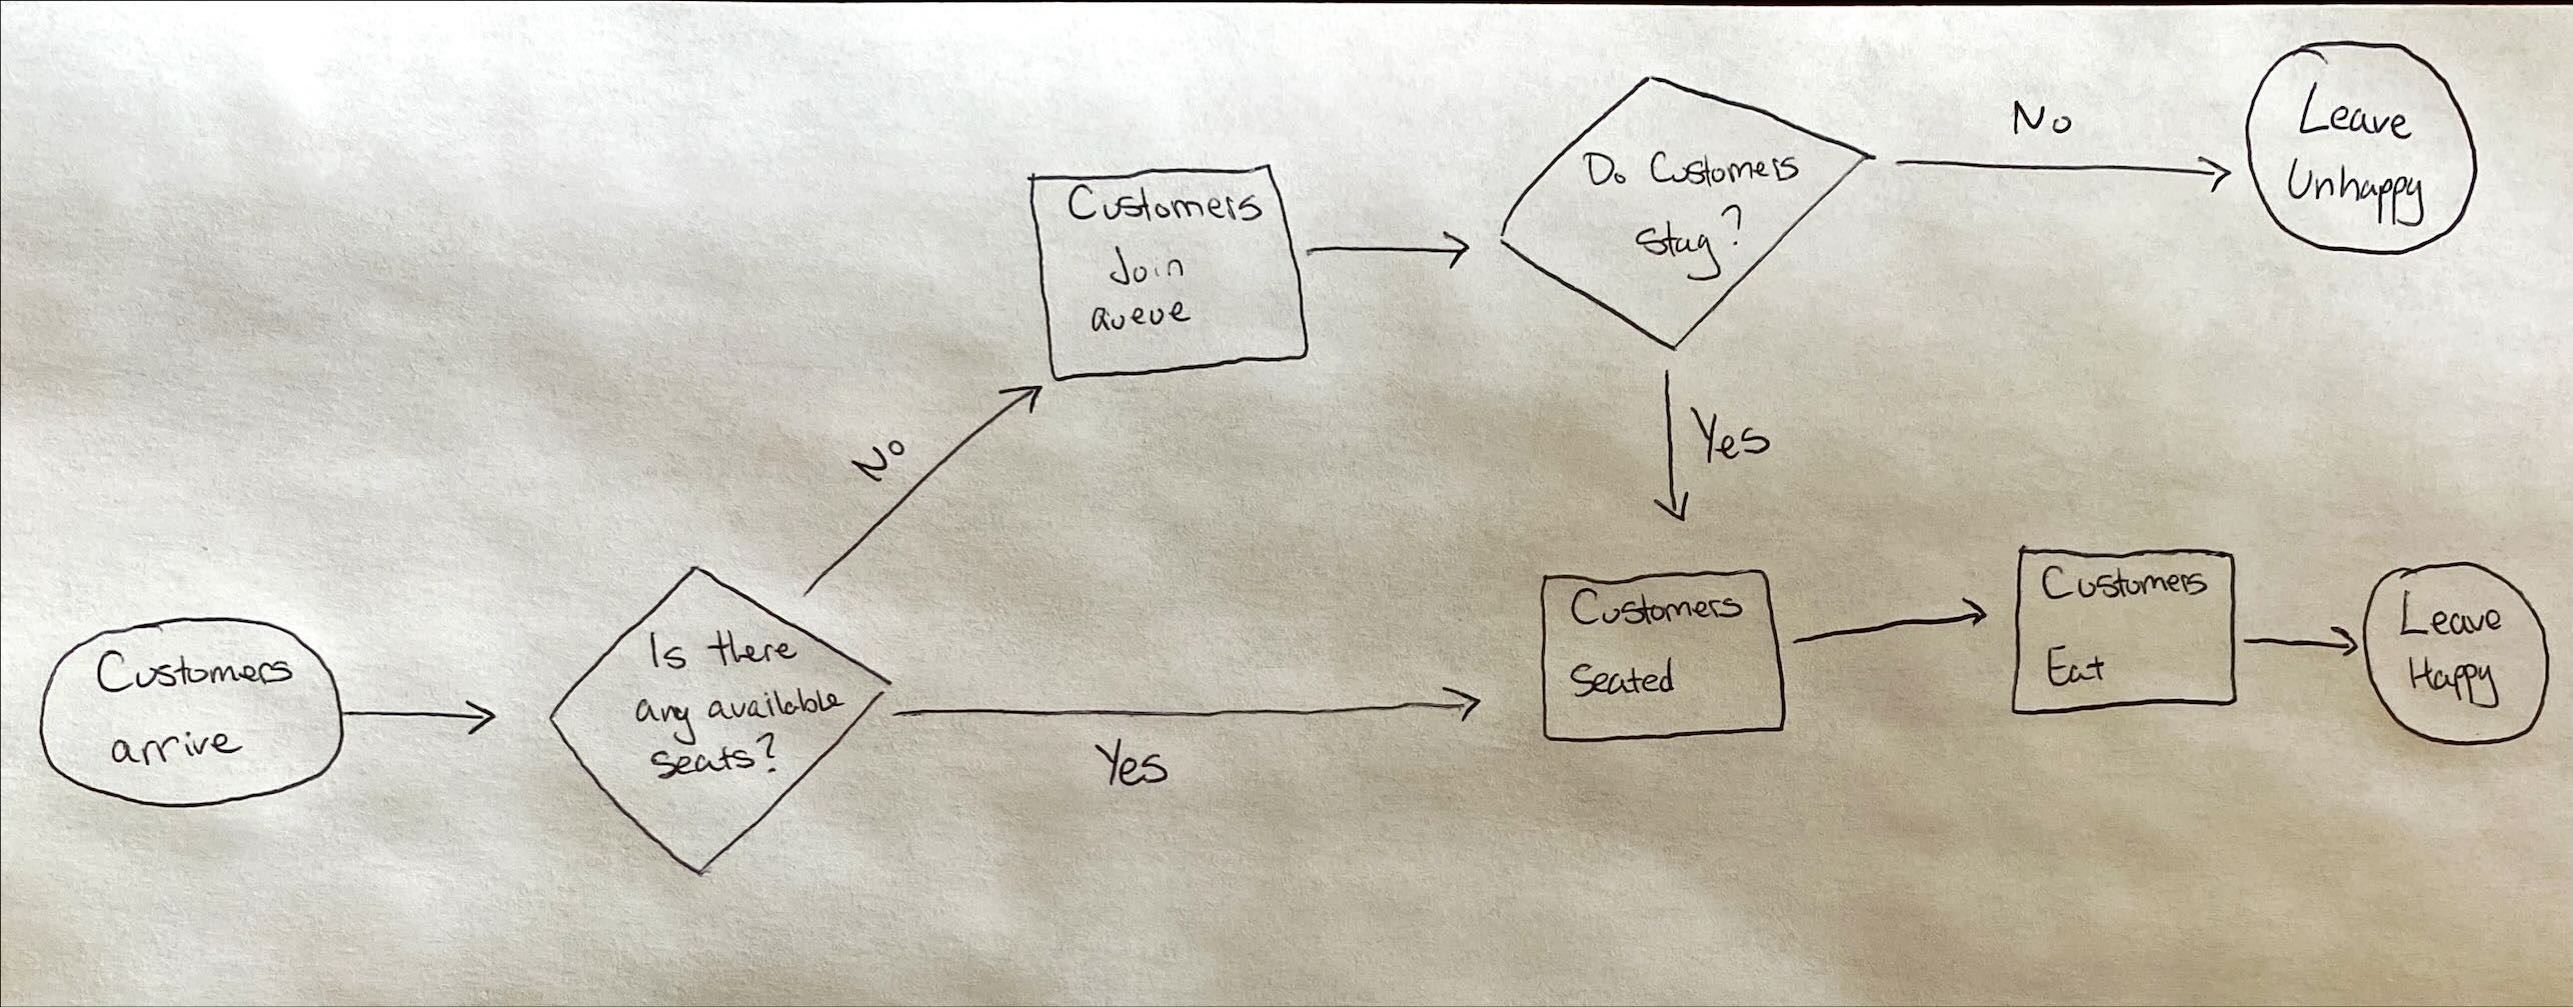

### Setting up Environment


In [18]:
import simpy
import numpy as np
import pandas as pd
import random
import statistics
import math
import collections
import seaborn as sns

### Creating the Simulation
#### Initial Conditions

These include the capacity of the restaurant, the amount of minutes a restaurant is open, the interval of customers coming to the restaurant, eating time, minimum patience, maximum patience.

#### Simulating the Restaurant Once
This will only be used to show that the simulation is working correctly.

In [22]:
random.seed(67)
NUM_TABLES = 10
EATING_TIME = random.uniform(30,120)
# I imagine that most groups of people take 30 minutes to 2 hours to finish eating once they have been seated.
INTERVAL_CUSTOMERS = math.floor(random.uniform(1,9)*random.uniform(1,5))
# The first random uniform is based on family size. The second is based on how many families show up at a restaurant at the same time.
TOTAL_SIM_TIME = 720
MIN_PATIENCE = 1
MAX_PATIENCE = 60

unhappy_customers= 0
happy_customers = 0

In [23]:
class Restaurant(object):
    def __init__(self, env, num_tables):
        self.env = env
        self.tables = simpy.Resource(env, num_tables)
        
    def serve(self, customer_group, eating_time):
        eating_time = random.uniform(30,120)
        yield self.env.timeout(eating_time)
        print(f"{customer_group} finished eating eating at {self.env.now:.2f}")
        
def customer_group(env, name, restaurant):
    arrive = env.now
    global unhappy_customers
    global happy_customers
    print(f"{name} arrives at the restaurant at {env.now:.2f}")
    with restaurant.tables.request() as request:
        patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
        results = yield request | env.timeout(patience)
        wait = env.now - arrive
                      
        if request in results:
            print(f"{name} has been seated at {env.now:.2f}")
            eating_time = random.uniform(30,120)
            yield env.process(restaurant.serve(name, eating_time))
            print(f"{name} has finished eating at {env.now:.2f}")
            happy_customers += 1
        else:
            print(f"{name} have left without being seated")
            unhappy_customers += 1
def setup(env, num_tables, t_inter):
    restauranT = Restaurant(env, num_tables)
    for i in range(1):
        env.process(customer_group(env, 'Group %d' % i, restauranT))
    while True:
        yield env.timeout(math.floor(random.uniform(1,7)))
        i += 1
        env.process(customer_group(env, 'Group %d' % i, restauranT))

In [24]:
env = simpy.Environment()
env.process(setup(env, NUM_TABLES, INTERVAL_CUSTOMERS))

<Process(setup) object at 0x162f150e340>

In [25]:
env.run(until=TOTAL_SIM_TIME)

Group 0 arrives at the restaurant at 0.00
Group 0 has been seated at 0.00
Group 1 arrives at the restaurant at 3.00
Group 1 has been seated at 3.00
Group 2 arrives at the restaurant at 9.00
Group 2 has been seated at 9.00
Group 3 arrives at the restaurant at 10.00
Group 3 has been seated at 10.00
Group 4 arrives at the restaurant at 12.00
Group 4 has been seated at 12.00
Group 5 arrives at the restaurant at 16.00
Group 5 has been seated at 16.00
Group 6 arrives at the restaurant at 17.00
Group 6 has been seated at 17.00
Group 7 arrives at the restaurant at 22.00
Group 7 has been seated at 22.00
Group 8 arrives at the restaurant at 25.00
Group 8 has been seated at 25.00
Group 9 arrives at the restaurant at 30.00
Group 9 has been seated at 30.00
Group 10 arrives at the restaurant at 31.00
Group 11 arrives at the restaurant at 36.00
Group 11 have left without being seated
Group 12 arrives at the restaurant at 39.00
Group 3 finished eating eating at 41.14
Group 3 has finished eating at 41.

In [26]:
print(happy_customers)

90


In [27]:
print(unhappy_customers)

91


Great. The simulation is working. We were able to see that 87 people were able to sit down and eat, while 103 people left before being served, when there was only 10 tables.

Now our goal is to run 100 simulations for each table size between 10 and 30. We will not use the print commands anymore because we know that our simulation is running correctly.

In [28]:
rows = []
for k in range(10,31):
    for j in range(100):
        NUM_TABLES = k
        EATING_TIME = random.uniform(30,120)
        INTERVAL_CUSTOMERS = math.floor(random.uniform(1,9)*random.uniform(1,5))
        TOTAL_SIM_TIME = 720
        MIN_PATIENCE = 1
        MAX_PATIENCE = 60

        unhappy_customers= 0
        happy_customers = 0
        total_customers = 0
        
        
        
        class Restaurant(object):
            def __init__(self, env, num_tables):
                self.env = env
                self.tables = simpy.Resource(env, num_tables)
        
            def serve(self, customer_group, eating_time):
                eating_time = random.uniform(30,120)
                yield self.env.timeout(eating_time)
                
        
        def customer_group(env, name, restaurant):
            arrive = env.now
            global unhappy_customers
            global happy_customers
            global total_customers
            with restaurant.tables.request() as request:
                total_customers +=1
                patience = random.uniform(MIN_PATIENCE, MAX_PATIENCE)
                results = yield request | env.timeout(patience)
                wait = env.now - arrive
                      
                if request in results:
                    eating_time = random.uniform(30,120)
                    yield env.process(restaurant.serve(name, eating_time))
                    happy_customers += 1
                else:
                    unhappy_customers += 1
        def setup(env, num_tables, t_inter):
            restauranT = Restaurant(env, num_tables)
            for i in range(1):
                env.process(customer_group(env, 'Group %d' % i, restauranT))
            while True:
                yield env.timeout(math.floor(random.uniform(1,7)))
                i += 1
                env.process(customer_group(env, 'Group %d' % i, restauranT))
                
        env = simpy.Environment()
        env.process(setup(env, NUM_TABLES, INTERVAL_CUSTOMERS))
        
        env.run(until=TOTAL_SIM_TIME)

        rows.append([k, happy_customers, unhappy_customers, total_customers])

Now we will use our rows list to create a dataframe.

In [29]:
df = pd.DataFrame(rows, columns=["table_amount", "happy_customers", "unhappy_customers", "total_customers"])

In [30]:
df["happy_percentage"] = df["happy_customers"]/df["total_customers"]
df["unhappy_percentage"] = df["unhappy_customers"]/df["total_customers"]

Now we will take the average amount of happy and unhappy customers per table capacity.

In [31]:
averages =[]
for i in range(10,31):
    df_i = df[df.table_amount == i]
    averages.append([i, df_i["happy_customers"].mean(), df_i["happy_percentage"].mean(), df_i["unhappy_customers"].mean(), df_i["unhappy_percentage"].mean()])

Then we will turn our list of averages into a dataframe.

In [35]:
df_avg = pd.DataFrame(averages, columns=["table_amount", "avg_happy_customers", "happy_percentage", "avg_unhappy_customers", "unhappy_percentage"])

In [36]:
df_avg.head()

,table_amount,avg_happy_customers,happy_percentage,avg_unhappy_customers,unhappy_percentage
0,10,88.84,0.431095,101.21,0.489717
1,11,98.49,0.477934,90.61,0.438916
2,12,106.72,0.518897,81.73,0.395994
3,13,115.29,0.559440,72.67,0.351552
4,14,124.09,0.601107,63.82,0.308143


We have accomplished what we wanted. We now have the average amount of happy and unhappy customers based on table capacity.

### Visualizations

<AxesSubplot:xlabel='table_amount', ylabel='avg_happy_customers'>

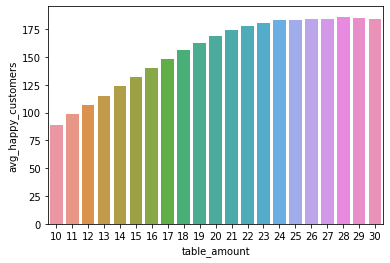

In [37]:
sns.barplot(x="table_amount", y="avg_happy_customers", data=df_avg)

It appears that there's not much of a difference in the amount of happy customers once you have more than 22 tables.

<AxesSubplot:xlabel='table_amount', ylabel='avg_unhappy_customers'>

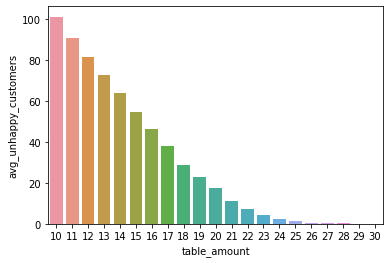

In [38]:
sns.barplot(x="table_amount",y="avg_unhappy_customers", data=df_avg)

Here we see that once a restaurant has more than 25 tables, only one customer group might leave.

<AxesSubplot:xlabel='table_amount', ylabel='happy_percentage'>

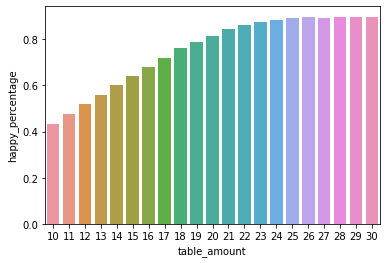

In [39]:
sns.barplot(x="table_amount",y="happy_percentage",data=df_avg)

Here we see that once a restaurant has more than 20 tables, they will be able to serve about 80 percent of the total potential customers. We should also note that if a restaurant has 10 tables then they won't be able to even serve half of the their total potential customers.

<AxesSubplot:xlabel='table_amount', ylabel='unhappy_percentage'>

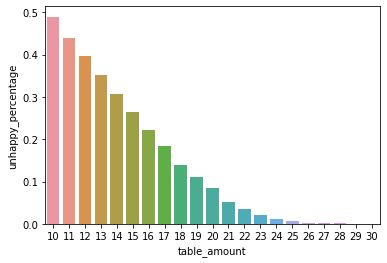

In [40]:
sns.barplot(x="table_amount",y="unhappy_percentage",data=df_avg)

Here we see that once a restaurant has more than 20 tables they lose less than 10% of their potential customers.

### Conclusions

In conclusion, it appears that a restaurant should have a minimum of 20 tables in order to be able to serve the majority of their potential clients. If a restaurant has more than 28 tables then they will likely be able to serve every potential customer.

If a store has between 15 and 19 tables than they should do anything to have 20 tables.

Any store below 15 should probably just remove indoor dining all together. They lose a lot of potential customers, which leads to these potential customers giving negative reviews about their restaurant. This is a double whammy. 

By switching to a delivery, pick-up only restaurant, tiny restaurants would be able to serve more clients and reduce the amount of loss.